# Introduction


Hello! I'm **Kush Gulati**, and after a long hiatus (~4 years to be exact), I'm reconnecting with my interest in data and analytics. It's been a while since I last dove into the world of data science, but this project is my comeback tour—ready to dust off my Python skills and have some fun predicting house prices in Ames, Iowa!

This competition is all about taking on a dataset packed with 79 variables and figuring out what really drives home prices beyond the obvious (spoiler alert: it's not all about the number of bedrooms).

## Objectives

The goals of this project are as follows:

- **Exploratory Data Analysis (EDA):** Dive deep into the dataset to answer some burning questions and gain insights into what variables might affect home prices. I’ll be slicing and dicing the data to make sense of what’s there—maybe even uncovering a few surprises.
  
- **Feature Engineering:** I’ll be working on creating new features (or improving existing ones) to get a better handle on the inputs. This step will involve transforming the data into something more palatable for machine learning models and having a little fun while doing it.

- **Machine Learning Models:** The pièce de résistance! I'll try out various machine learning models, including advanced regression techniques like random forests and gradient boosting, to predict home prices. This is where the real fun begins—tweaking models, tuning hyperparameters, and seeing how well they perform.

Stay tuned as I embark on this data science journey. Let’s see if we can predict what your dream house is really worth (hint: it’s probably more than just a white-picket fence)!



# ACT I: Let's Meet the Data

Alright, it’s time to get acquainted with the data—the backbone of this project. We’re working with the **Ames Housing Dataset**, which is packed with 79 features that describe just about every aspect of residential homes in Ames, Iowa. 

We have variables like **MSSubClass** (the type of dwelling involved in the sale), **LotFrontage** (linear feet of street connected to the property), and even **Condition1** (proximity to various conditions like streets or parks). While some of these features obviously seem important (who doesn’t love a big **GrLivArea**?), there are others that will likely surprise me if they turn out to matter at all—like **Alley** access. Do people really pay more for a house just because they can drive around back?

## The Data

Here’s a more comprehensive breakdown of the types of features in the dataset:

| **Category**      | **Description**                                                   | **Variables**                                                                 |
|-------------------|-------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **Dwelling Type**  | The type and style of the house                                   | "MSSubClass", "BldgType", "HouseStyle"                                        |
| **Zoning**         | The zoning classification of the area                            | "MSZoning"                                                                   |
| **Lot Attributes** | Attributes of the lot such as size, frontage, and shape           | "LotFrontage", "LotArea", "LotShape", "LandContour", "LandSlope", "LotConfig" |
| **Neighborhood**   | Location and neighborhood within Ames                            | "Neighborhood", "Condition1", "Condition2"                                    |
| **Condition**      | Proximity to various conditions like streets, railroads, parks    | "Condition1", "Condition2"                                                    |
| **Building Quality** | Quality of the building and materials                           | "OverallQual", "OverallCond", "ExterQual", "ExterCond"                        |
| **Basement**       | Basement-related features such as size, exposure, and quality     | "BsmtQual", "BsmtCond", "TotalBsmtSF", "BsmtFinType1", "BsmtFinSF1", "BsmtExposure" |
| **Living Area**    | Square footage of different parts of the home                    | "1stFlrSF", "2ndFlrSF", "GrLivArea", "TotRmsAbvGrd"                           |
| **Year**           | Year the home was built and remodeled                            | "YearBuilt", "YearRemodAdd"                                                   |
| **Garage**         | Garage-related attributes                                        | "GarageType", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond" |
| **Exterior**       | Exterior features like materials and porches                     | "Exterior1st", "Exterior2nd", "EnclosedPorch", "OpenPorchSF", "ScreenPorch"   |
| **Utilities**      | Available utilities in the house                                 | "Utilities"                                                                  |
| **Miscellaneous**  | Other random features                                            | "Alley", "PoolQC", "Fence", "MiscFeature"                                     |

#### MVPs (Most Valuable Predictors)

These are the features I’m feeling confident about. I expect them to have a strong impact on housing prices:

- **GrLivArea (Above-grade living area)**: The more living space, the better.
- **OverallQual (Overall quality)**: Homes with better materials and craftsmanship are bound to be worth more.
- **Neighborhood**: Location, location, location! Desirable neighborhoods should drive higher prices.
- **YearBuilt**: Newer homes might be worth more, depending on the area.
- **GarageCars & GarageArea**: A bigger garage (both in size and car capacity) seems like an attractive feature for buyers.
  
#### The Red Herrings (Features that might seem important but probably aren’t)

On the flip side, here are some features I’d be surprised to see making much of a difference:

- **Alley**: Whether or not the house has alley access seems like a negligible factor.
- **PoolQC (Pool quality)**: While having a pool could matter in some markets, I’m not convinced Ames, Iowa, is one of them.
- **MiscFeature**: The value of things like sheds or tennis courts might be hard to translate into home prices.
- **LandSlope**: Unless we’re talking about extreme hills, I don’t expect slope to affect prices much.

---

As I dive deeper into the dataset and run some exploratory analysis, I’ll put these hypotheses to the test. Let’s see if the MVPs pull through and if the Losers surprise me with any hidden value!


## Loading in the data

In [137]:
# Loading necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p
from sklearn.preprocessing import RobustScaler

In [138]:
# Loading datasets 
try: 
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")
except:
    train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
    test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [139]:
train.shape

(1460, 81)

In [140]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [141]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Preprocessing

In [142]:
# Dropping Id column 
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [143]:
y = train["SalePrice"].reset_index(drop=True)
train_features = train.drop(["SalePrice"], axis=1)
test_features = test

In [144]:
# Merging train and test features to deal with missing data and feature engineering, so we don't have to duplicate operations 
features = pd.concat([train_features, test_features]).reset_index(drop=True)
features.shape

(2919, 79)

## Missing Data

Missing data is always a challenge, and the Ames Housing Dataset has its share of gaps. I'll start by assessing which variables have missing values and the extent of the missingness. For categorical features where missing values indicate the absence of something (like **Alley** or **PoolQC**, where 'missing' likely means 'no alley' or 'no pool'), I'll fill these with appropriate labels such as 'None.' For numerical fields with small amounts of missing data, I'll apply median imputation to prevent skewing the results. In cases where a large portion of data is missing and not critical to the analysis, I may consider dropping those features. The goal is to handle missing data thoughtfully to maintain the integrity of the dataset without introducing bias.

In [145]:
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (%)'])
missing_data[missing_data["Percent (%)"]>0]

Total  Percent (%)
PoolQC         2909    99.657417
MiscFeature    2814    96.402878
Alley          2721    93.216855
Fence          2348    80.438506
FireplaceQu    1420    48.646797
LotFrontage     486    16.649538
GarageYrBlt     159     5.447071
GarageFinish    159     5.447071
GarageQual      159     5.447071
GarageCond      159     5.447071
GarageType      157     5.378554
BsmtExposure     82     2.809181
BsmtCond         82     2.809181
BsmtQual         81     2.774923
BsmtFinType2     80     2.740665
BsmtFinType1     79     2.706406
MasVnrType       24     0.822199
MasVnrArea       23     0.787941
MSZoning          4     0.137033
Functional        2     0.068517
BsmtHalfBath      2     0.068517
BsmtFullBath      2     0.068517
Utilities         2     0.068517
SaleType          1     0.034258
BsmtFinSF1        1     0.034258
KitchenQual       1     0.034258
GarageCars        1     0.034258
BsmtUnfSF         1     0.034258
TotalBsmtSF       1     0.034258
Exterior2nd       1     0.034258
Exterior1st       1     0.034258
GarageArea        1     0.034258
Electrical        1     0.034258
BsmtFinSF2        1     0.034258

Looking at the table of missing values, it's clear that some features are missing significant portions of data. Let’s break down a few of the most notable ones:

- **PoolQC (99.7% missing)**: Unsurprisingly, very few homes in Ames, Iowa, have pools. Most of the missing values likely indicate the absence of a pool rather than missing information. I’ll treat these as ‘No Pool,’ since having a pool is more of a rare feature in this dataset.
  
- **MiscFeature (96.4% missing)**: This column likely represents a variety of miscellaneous features, such as sheds or tennis courts, which are not common in the average home. Similar to PoolQC, most homes simply don’t have these features, so I’ll assume the missing data indicates 'None' for these.

- **Alley (93.2% missing)**: The large number of missing values here likely means many homes don’t have alley access. Given that alleys are not a standard feature in many residential areas, I’ll treat these missing values as ‘No Alley.’

- **Fence (80.4% missing)**: Like the other high-percentage missing features, this likely indicates that many homes simply don’t have fences. I’ll treat these as 'No Fence,' as it doesn’t represent truly missing information but the absence of the feature itself.

- **FireplaceQu (48.6% missing)**: Almost half of the homes in the dataset are missing fireplace quality ratings, which probably means they don’t have fireplaces. I’ll fill these missing values with 'No Fireplace.'

On the other hand, features like **LotFrontage** (16.6% missing) and **GarageYrBlt** (5.4% missing) are more concerning because they represent valuable numeric data, such as the lot's frontage length and the garage's build year. I’ll likely use median imputation for these variables since they are more integral to the structure of the home and don’t just represent optional features.

The basement-related features (e.g., **BsmtExposure**, **BsmtQual**) are missing around 2.8% of their data. This could indicate homes without basements, which I'll treat as a separate category.

Overall, many of the variables with high missing percentages correspond to optional or rare home features, and the approach to handle these missing values will mostly involve filling in logical defaults (like 'None' or 'No'). For numeric values, I’ll handle them with median imputation to avoid skewing the dataset too much.


## Handling Missing Data

Digging deeper into the analysis above, here's my approach for handling missing data in the table below:

| **Approach**  | **Variables**                                                                                             |
|------------------------|----------------------------------------------------------------------------------------------------------|
| NaN = 'None'            | `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `GarageFinish`, `GarageQual`, `GarageCond`, `GarageType`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `MasVnrType` |
| NaN = 0                | `BsmtFinSF1`, `BsmtFinSF2`, `GarageCars`, `GarageArea`, `BsmtUnfSF`, `TotalBsmtSF`, `LotFrontage`, `MasVnrArea` |
| NaN = median           | `LotFrontage`, `GarageYrBlt` |
| NaN = mode             | `Electrical`, `MSZoning`, `Functional`, `Utilities`, `SaleType`, `KitchenQual`, `BsmtQual`, `BsmtCond`, `BsmtFullBath`, `BsmtHalfBath`, `Exterior1st`, `Exterior2nd` |
| Drop if needed (very few NaNs) | `Exterior1st`, `Exterior2nd` |

In [146]:
nones = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "GarageType", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType"]
[features[col].replace(np.nan, 'None', inplace=True) for col in nones]

zeros = ["BsmtFinSF1", "BsmtFinSF2", "GarageCars", "GarageArea", "BsmtUnfSF", "TotalBsmtSF", "LotFrontage", "MasVnrArea"]
[features[col].replace(np.nan, 0, inplace=True) for col in zeros]

medians = ["LotFrontage", "GarageYrBlt"]
[features[col].replace(np.nan, features[col].median(), inplace=True) for col in medians]

modes = ["Electrical", "MSZoning", "Functional", "Utilities", "SaleType", "KitchenQual", "BsmtQual", "BsmtCond", "BsmtFullBath", "BsmtHalfBath", "Exterior1st", "Exterior2nd"]
[features[col].replace(np.nan, features[col].mode()[0], inplace=True) for col in modes]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [147]:
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (%)'])
missing_data[missing_data["Percent (%)"]>0]

Empty DataFrame
Columns: [Total, Percent (%)]
Index: []

# ACT II: Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the detective work of the data science process—a critical step where we dive into the dataset to uncover its structure, patterns, and quirks. It’s where raw data transforms into meaningful insights and provides a foundation for building effective models. EDA helps us understand the relationships between variables, spot outliers, and identify potential issues like missing values or skewness that could derail our analysis later. By visualizing and summarizing the data, we gain a clear sense of its story, enabling us to make informed decisions about feature selection, transformations, and model strategies. Without EDA, it’s like trying to solve a mystery without inspecting the clues—a recipe for disaster. Simply put, EDA is the bridge between raw data and actionable models, ensuring we approach the machine learning process with confidence and a deep understanding of our data.


In [148]:
pd.set_option('display.max_columns', None)
features.head()


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

## Correlations

Understanding correlations between variables is a crucial step in feature selection and engineering. Highly correlated variables can provide valuable insights into relationships within the data but may also introduce multicollinearity in certain models, such as linear regression. By identifying these relationships, we can better understand the structure of the dataset and make informed decisions about which variables to include, combine, or transform.

/var/folders/zr/0vj3n9ps7cn_6n3hgl_fbzv80000gn/T/ipykernel_34671/1754104506.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


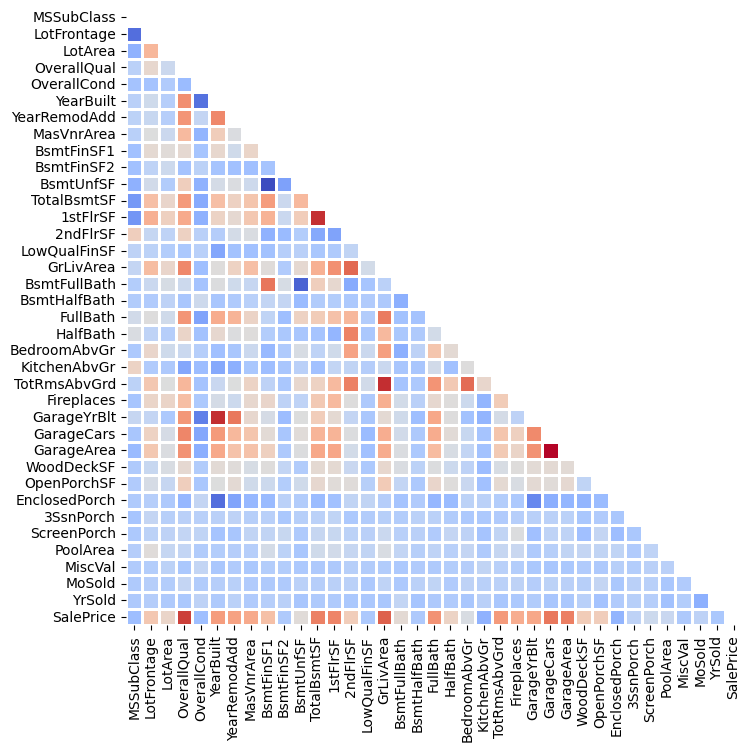

In [149]:
corr = train.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,
            cmap='coolwarm',
            square=True,
            mask=np.triu(corr),
            linewidths=1,
            cbar=False)

plt.show()

## Analyzing Highly Correlated Variables (r >= 0.8)

Here’s a quick breakdown of why I believe certain variables show strong correlations:

- **OverallQual and SalePrice**: It's no surprise that the overall quality of a home is strongly linked to its sale price. Buyers tend to value homes with better materials, craftsmanship, and finishes, making this a direct and intuitive relationship.

- **GrLivArea and SalePrice**: Larger above-grade living areas typically command higher prices since they provide more usable space. This relationship reflects the importance of square footage in real estate valuation.

- **GarageArea and GarageCars**: These two variables are inherently connected because larger garages usually have more car capacity. The strong correlation reflects this direct structural relationship.

- **TotRmsAbvGrd and GrLivArea**: The number of rooms above grade is naturally related to the total above-grade living area. Homes with more living space generally have more rooms, leading to this close correlation.

- **1stFlrSF and TotalBsmtSF**: The total basement area often mirrors the footprint of the first floor, as homes are typically constructed with basements extending beneath the main level.

- **GarageYrBlt and YearBuilt**: Garages are often built at the same time as the house, so these variables are closely related. This correlation reflects the construction timeline of the property.

These relationships highlight both intuitive and structural dependencies in the dataset, guiding us in how we handle or combine these variables for machine learning models.


## Analyzing Categorical Variables 

In [150]:
def srt_box(y, df):
    
    '''A function for displaying categorical variables.'''
    
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

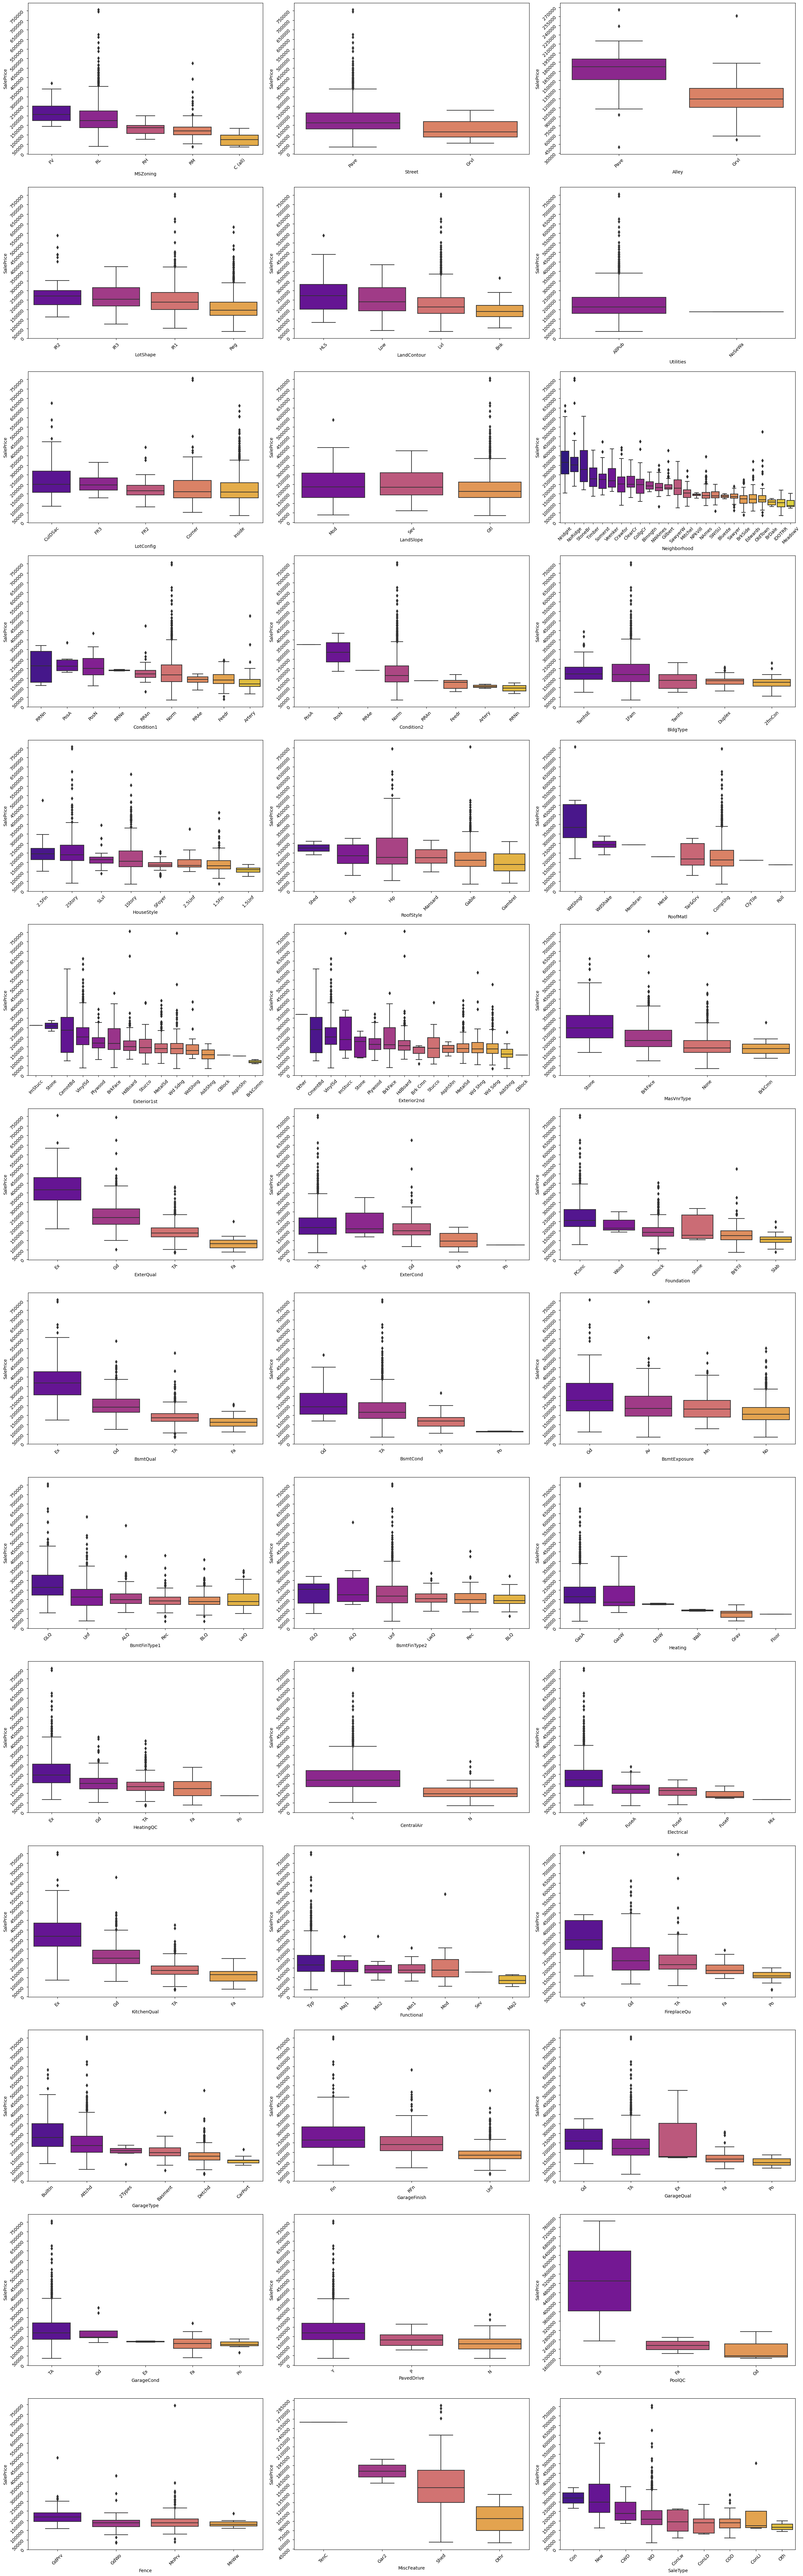

In [151]:
srt_box("SalePrice", train)

## Key Observations on Categorical Variables

Digging into the categorical variables in the dataset reveals some fascinating (and occasionally expected) insights into what influences housing prices. Here’s what caught my attention:

- **MSZoning**: Turns out, "Floating Village" zoning steals the spotlight with the highest median prices. It's followed by the more conventional residential zones, with commercial zones trailing behind as the least expensive—perhaps proximity to office spaces doesn’t quite scream "dream home."

- **Alley**: Who knew alley access could have such a dramatic impact? Houses with **paved alleys** command significantly higher median values than those with gravel alleys. Clearly, smoother rides make for smoother property values.

- **LandContour**: Elevation matters! Houses perched on the hillside boast the highest median prices, while those on banked lots (quick rises from street grade to the building) seem to drag their property values down.

- **Neighborhood**: As they say: location, location, location. Neighborhoods like **Northridge Heights**, **Northridge**, and **Timberland** reign supreme as the most expensive. Meanwhile, **Old Town** and **Edwards** offer a mix of affordability with occasional outliers, and **Briardale**, **Iowa DOT and Rail Road**, and **Meadow Village** round out the bottom with the cheapest homes. It’s amazing to see how neighborhood identity plays such a defining role in property value.

- **Conditions**: Proximity is a double-edged sword. Being near parks or greenbelts is great for property values, but adjacency to feeder or arterial streets has the opposite effect. Meanwhile, living close to the North-South Railroad surprisingly fetches higher values—who knew?

- **Roof Style**: Style matters, even for roofs. Homes with **shed-style roofs** top the charts in value, while barn-style roofs (perhaps a tad too rustic?) anchor the bottom.

- **Exterior**: The exterior says a lot about the house—and the wallet. Poured concrete foundations align with the highest property values, while slab foundations sit on the other end of the spectrum.

- **Basement**: The basement is more than just a bonus space. Height, condition, finish, and exposure are all major contributors to median property prices. A well-finished basement is clearly worth the investment.

- **Kitchen**: No surprises here—kitchen quality is a direct indicator of housing prices. Fancy kitchens, fancy price tags.

- **Central Air**: In a revelation as warm as it is predictable, homes with central AC have significantly higher median values than their sweltering counterparts.

- **Garage**: Not all garages are created equal. Built-in garages (with rooms above them) are the most valuable, followed by attached garages. On the flip side, carports barely register as a value booster.

- **Driveway**: Driveways matter too—houses with paved driveways fetch significantly higher prices than those with dirt or partially paved ones. Because who wants to pull up to a dirt path when they come home?

In [152]:
# Converting some of the categorical values to numeric ones. Choosing similar values for closer groups to balance linear relations...

neigh_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

features['Neighborhood'] = features['Neighborhood'].map(neigh_map).astype(
    'int')
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['ExterQual'] = features['ExterQual'].map(ext_map).astype('int')
features['ExterCond'] = features['ExterCond'].map(ext_map).astype('int')
bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['BsmtQual'] = features['BsmtQual'].map(bsm_map).astype('int')
features['BsmtCond'] = features['BsmtCond'].map(bsm_map).astype('int')
bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

features['BsmtFinType1'] = features['BsmtFinType1'].map(bsmf_map).astype('int')
features['BsmtFinType2'] = features['BsmtFinType2'].map(bsmf_map).astype('int')
heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['HeatingQC'] = features['HeatingQC'].map(heat_map).astype('int')
features['KitchenQual'] = features['KitchenQual'].map(heat_map).astype('int')
features['FireplaceQu'] = features['FireplaceQu'].map(bsm_map).astype('int')
features['GarageCond'] = features['GarageCond'].map(bsm_map).astype('int')
features['GarageQual'] = features['GarageQual'].map(bsm_map).astype('int')

## Analyzing Numerical Variables

In [153]:
# Plotting numerical features with polynomial order to detect outliers by eye.

def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

/Users/kushgulati/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:254: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
/Users/kushgulati/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:254: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


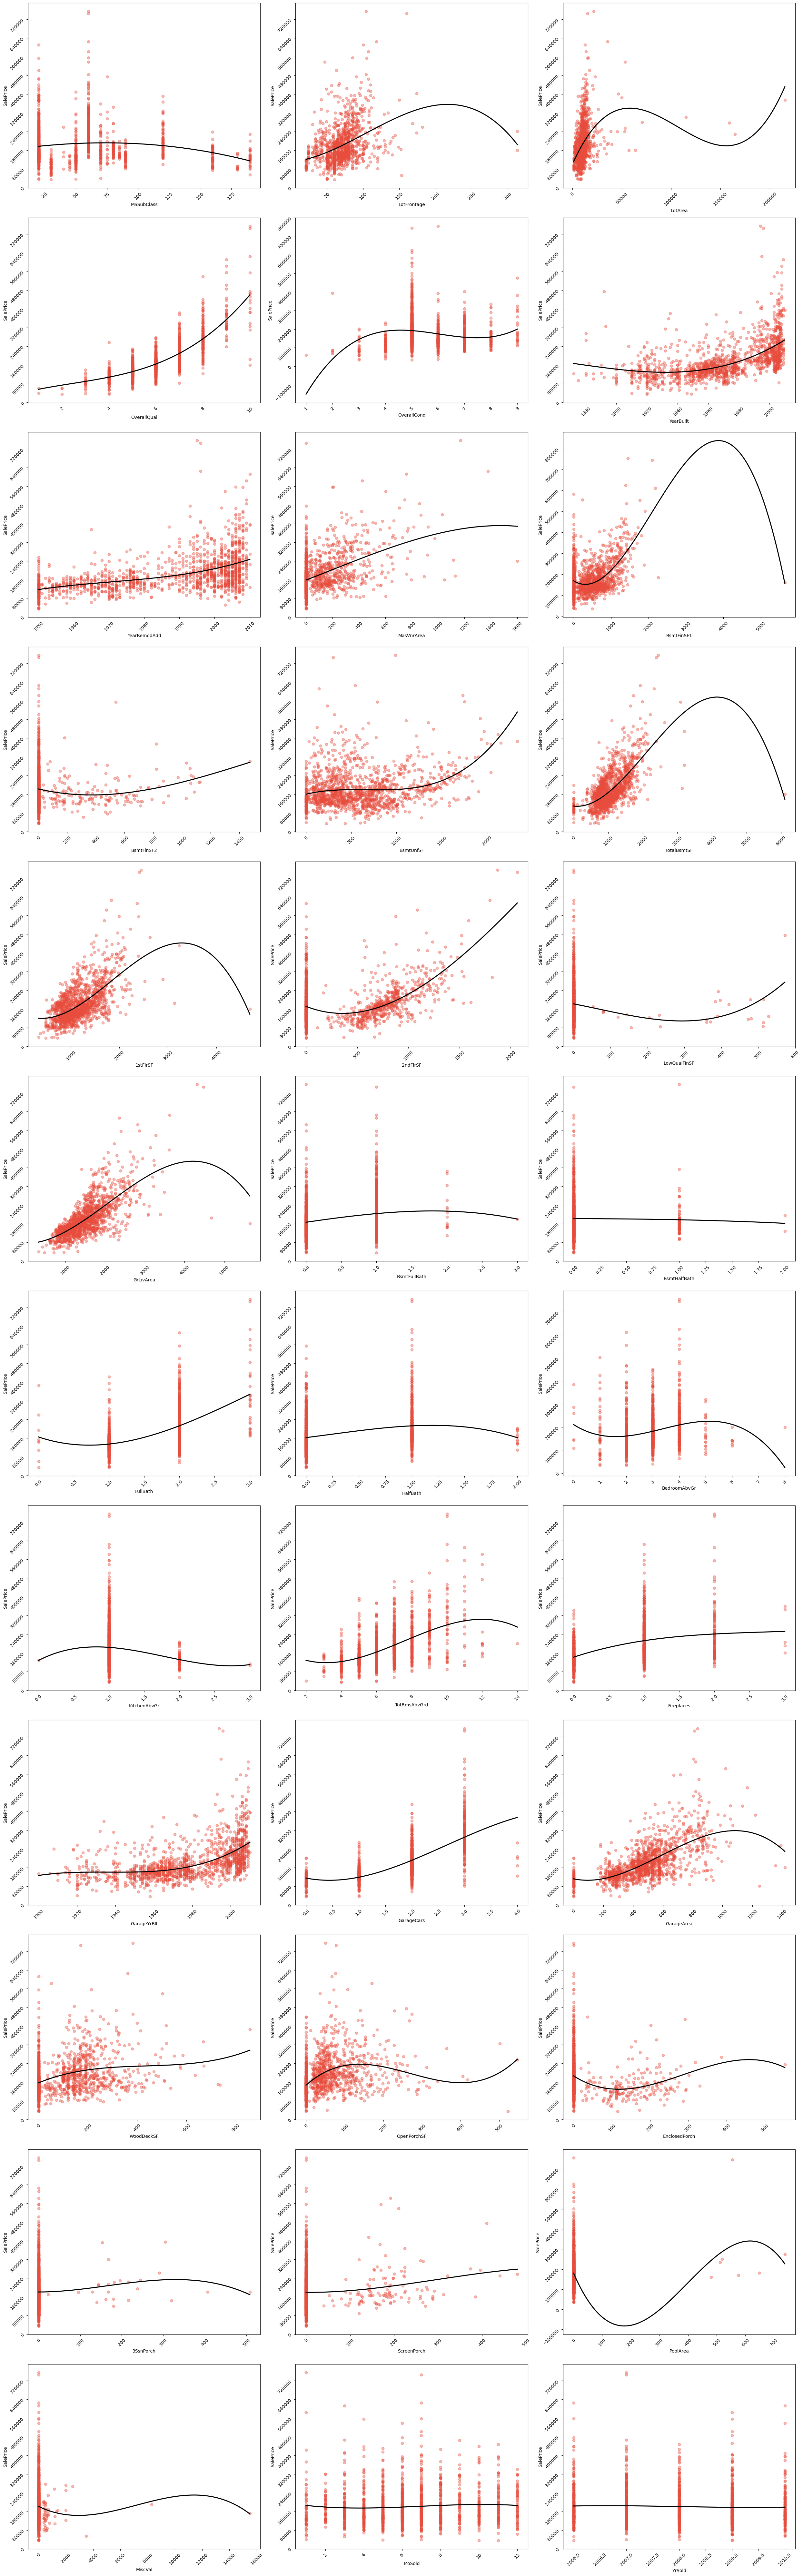

In [154]:
srt_reg('SalePrice', train)

# ACT IV: Feature Engineering

Before diving into machine learning (my favorite part), there’s an essential step that separates the amateurs from the pros: **feature engineering**. This process is all about transforming raw data into meaningful inputs that your model can understand and, more importantly, make sense of.

Feature engineering isn’t just a technical necessity—it’s a creative process. It involves identifying patterns, relationships, and anomalies in the dataset, and then encoding those insights into features that can improve your model’s performance. In many cases, the quality of your features determines the success of your machine learning model far more than the choice of algorithm itself.

### Why Feature Engineering Matters

1. **Bridging the Gap Between Data and Models**: Machine learning algorithms are powerful, but they can’t magically understand raw data. Feature engineering creates a more structured and relevant set of inputs that help the model make informed predictions.

2. **Capturing Domain Knowledge**: Every dataset tells a story. For example, in the Ames Housing Dataset, variables like `Neighborhood` or `GrLivArea` already contain hints about housing prices. Feature engineering allows us to refine these insights, such as grouping similar neighborhoods or creating new features like price per square foot.

3. **Improving Model Performance**: Well-crafted features can reduce noise, emphasize important trends, and make your data more predictive. For example, transforming categorical variables into dummy variables or scaling numerical features ensures that the model doesn’t misinterpret their importance.


One powerful feature engineering technique is **aggregation**. By combining related variables, we can reduce noise, emphasize important relationships, and provide the machine learning model with richer inputs. For this project, I aggregated several groups of variables that capture the total quality and functionality of the home, which should provide a more holistic view of the property’s value.

The approach centers on combining individual components into aggregated features that represent total values or scores. For example, instead of treating basement or garage quality variables separately, I summed them into `TotalBsmQual` and `TotalGrgQual` to capture overall basement and garage quality. Similarly, I introduced features like `TotalSF` and `TotalBathrooms` to simplify the representation of living space and bathrooms.

This method not only reduces dimensionality but also aligns with how buyers and appraisers think about homes—they don’t look at each component in isolation but rather at the overall package. 

### Aggregated Features and Their Rationale

| **Feature Name**      | **Variables Involved**                                                | **Reasoning**                                                                                     |
|------------------------|----------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| `TotalSF`            | `BsmtFinSF1`, `BsmtFinSF2`, `1stFlrSF`, `2ndFlrSF`                   | Represents the total usable square footage of the house, which is a key driver of home prices.   |
| `TotalBathrooms`     | `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`              | Aggregates all bathroom features into one metric, reflecting the total number of bathrooms weighted by type. |
| `TotalExtQual`       | `ExterQual`, `ExterCond`                                             | Combines exterior quality and condition into a single score to capture overall exterior quality. |
| `TotalBsmQual`       | `BsmtQual`, `BsmtCond`, `BsmtFinType1`, `BsmtFinType2`              | Aggregates all basement-related quality scores to reflect overall basement quality and usability. |
| `TotalGrgQual`       | `GarageQual`, `GarageCond`                                           | Combines garage quality and condition into a single score to measure overall garage quality.     |
| `TotalQual`          | `OverallQual`, `TotalExtQual`, `TotalBsmQual`, `TotalGrgQual`, `KitchenQual`, `HeatingQC` | Captures the total quality of the home by combining key quality measures across different components. |


In [155]:
#Aggregation of Variables 

features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                       features['1stFlrSF'] + features['2ndFlrSF'])
features['TotalBathrooms'] = (features['FullBath'] +
                              (0.5 * features['HalfBath']) +
                              features['BsmtFullBath'] +
                              (0.5 * features['BsmtHalfBath']))

features['TotalExtQual'] = (features['ExterQual'] + features['ExterCond'])
features['TotalBsmQual'] = (features['BsmtQual'] + features['BsmtCond'] +
                            features['BsmtFinType1'] +
                            features['BsmtFinType2'])
features['TotalGrgQual'] = (features['GarageQual'] + features['GarageCond'])
features['TotalQual'] = features['OverallQual'] + features[
    'TotalExtQual'] + features['TotalBsmQual'] + features[
        'TotalGrgQual'] + features['KitchenQual'] + features['HeatingQC']

## Skewness Testing: Understanding the Distributions 
Before diving into model training, it’s essential to assess the distributions of our target variable and key features. Many machine learning models, especially regression-based ones, perform better when the data is normally distributed or at least less skewed. Skewness can distort relationships between variables and impact the model's ability to generalize effectively.

### Why Test for Skewness?

1. **Impact on Model Performance**: Highly skewed data can lead to models that overfit to outliers or fail to capture the central trends in the data.
2. **Improved Interpretability**: Normalizing distributions (e.g., via logarithmic transformations) often makes the data more interpretable and aligns it better with real-world relationships.
3. **Target Variable Sensitivity**: For the target variable (e.g., `SalePrice`), reducing skewness ensures that the model doesn't overemphasize extreme values, leading to more stable predictions.
4. **Feature Optimization**: Features with excessive skewness might benefit from transformations to reduce noise and improve their predictive power.

By testing for skewness at this stage, we can identify variables that require transformation, ensuring a more robust and reliable model down the line.

### Skewed Features 
Taking a look at the distributions in the **Analyzing Numerical Variables** section, `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `GarageYrBlt`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `LowQualFinSF`, and `MiscVal` appear quite skewed. We can use a boxcox transformation to fix the skewness. I am using 0.5 as a threshold for high skew. 

In [156]:
skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]

# Finding skewness 
skew_features = np.abs(features[skewed].apply(lambda x: skew(x)).sort_values(
    ascending=False))
skew_features

# Filter skewed features
high_skew = skew_features[skew_features > 0.5]

# Taking indexes of high skew
skew_index = high_skew.index

# Applying boxcox transformation to fix skewness
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

/Users/kushgulati/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/kushgulati/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


## Skewed Target Variable

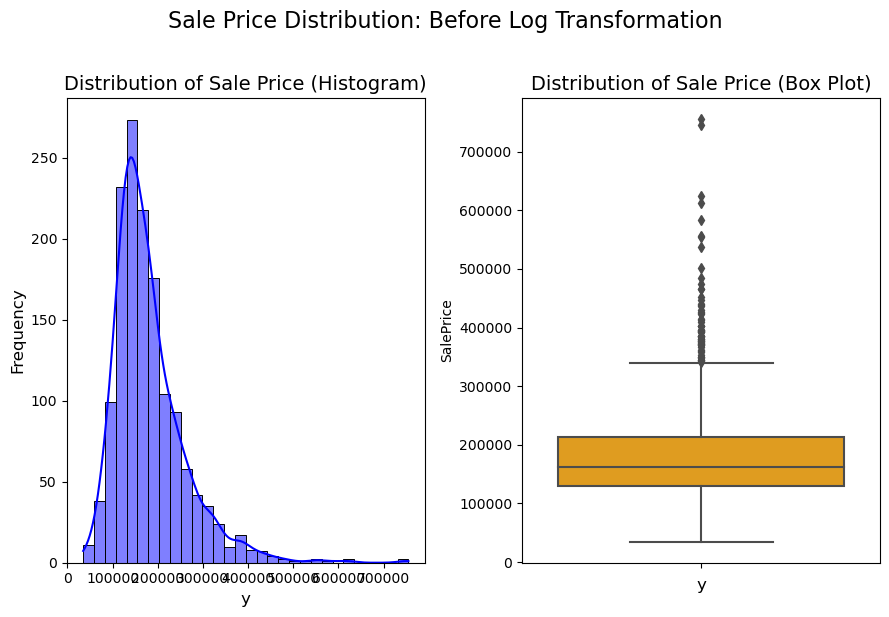

In [157]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(9, 6))

fig.suptitle("Sale Price Distribution: Before Log Transformation", fontsize=16, y=1.02)


# Histogram on the left
sns.histplot(y, kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title("Distribution of Sale Price (Histogram)", fontsize=14)
axes[0].set_xlabel("y", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Box plot on the right
sns.boxplot(y=y, color='orange', ax=axes[1])
axes[1].set_title("Distribution of Sale Price (Box Plot)", fontsize=14)
axes[1].set_xlabel("y", fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

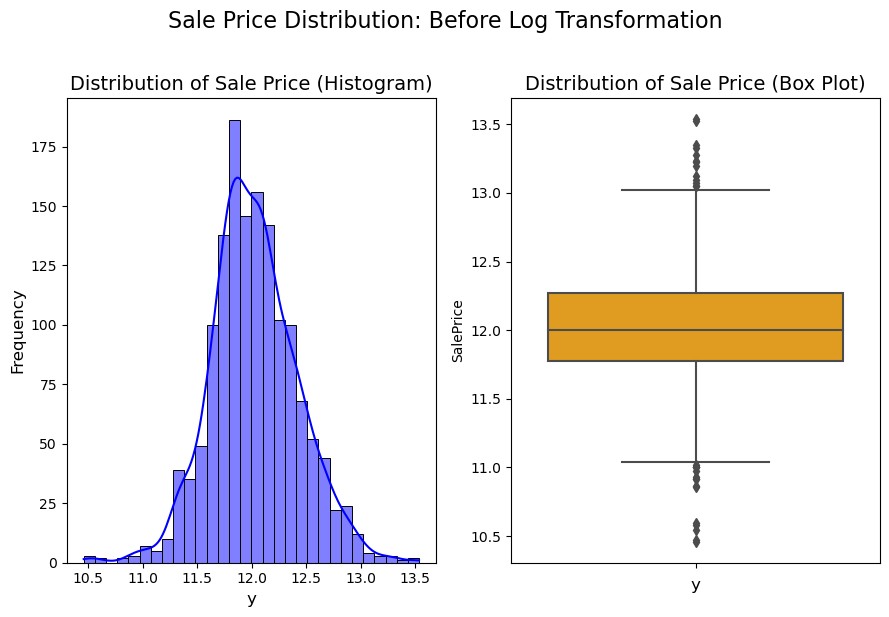

In [158]:
y = np.log1p(y)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(9, 6))

fig.suptitle("Sale Price Distribution: Before Log Transformation", fontsize=16, y=1.02)


# Histogram on the left
sns.histplot(y, kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title("Distribution of Sale Price (Histogram)", fontsize=14)
axes[0].set_xlabel("y", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Box plot on the right
sns.boxplot(y=y, color='orange', ax=axes[1])
axes[1].set_title("Distribution of Sale Price (Box Plot)", fontsize=14)
axes[1].set_xlabel("y", fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

## Scaling Data

Scaling is a critical step in the premodeling process, particularly for machine learning algorithms that are sensitive to the scale of input features. Many algorithms, such as gradient boosting, support vector machines, and neural networks, perform better when the input features are on a similar scale. Without scaling, features with larger ranges can dominate the learning process, leading to suboptimal models.

### Why Use RobustScaler?

For this project, I’ll use **RobustScaler** to scale the features. RobustScaler is particularly useful when dealing with datasets that contain outliers, as it is more resilient to extreme values compared to standard scaling methods like `StandardScaler` or `MinMaxScaler`. Here’s how it works:
- **Centering on the Median**: RobustScaler removes the median of each feature rather than the mean, making it less affected by outliers.
- **Scaling Based on IQR**: It scales the data according to the interquartile range (IQR), which further reduces the impact of outliers by focusing on the spread of the central 50% of the data.

This approach ensures that the data is scaled appropriately without being overly influenced by outliers, which is especially important for features that exhibit high skew or extreme values.

### Benefits of Scaling with RobustScaler
- **Handles Outliers Effectively**: Ensures that extreme values do not distort the scale of the features.
- **Improves Model Convergence**: Models that rely on optimization (e.g., linear regression, SVMs) can converge faster and more reliably when features are scaled.
- **Equal Importance for All Features**: By scaling, features with large ranges don’t dominate those with smaller ranges, ensuring fair representation in the model.

By applying RobustScaler, the dataset becomes more balanced and ready for modeling, enhancing both performance and interpretability.

In [159]:
cols = features.select_dtypes(np.number).columns
transformer = RobustScaler().fit(features[cols])
features[cols] = transformer.transform(features[cols])

## Pre-Modeling Final Checks

Before jumping into model training, I want to ensure the data is fully prepared and ready for machine learning. This step involves transforming categorical variables into a format that our models can understand and double-checking that the shapes of our training and target data align correctly.

### Creating Dummy Variables

Machine learning models typically can't handle categorical data in their raw form, so we need to convert these variables into **dummy variables** (also known as one-hot encoding). This process creates binary columns for each category, ensuring that the information is captured in a numerical format without imposing any ordinal relationships where they don't exist. For example, a categorical variable like `MSZoning` with values such as `RL`, `RM`, and `FV` will be transformed into separate binary columns: `MSZoning_RL`, `MSZoning_RM`, and `MSZoning_FV`. 

This step ensures that the model treats each category as distinct and interprets them correctly.

In [160]:
features = pd.get_dummies(data=features)

### Checking Data Shapes

After transforming the categorical variables, it's critical to confirm that the shapes of the features and target data make sense. Specifically:
- The **training features** should have the same number of rows as the **target variable** to avoid misalignment during training.
- After adding dummy variables, the total number of columns (features) should reflect all the original numeric variables, engineered features, and newly created dummy variables.

By performing these final checks, we ensure there are no surprises when fitting the model. Catching shape mismatches or encoding errors now will hopefully save me from some debugging later!

In [161]:
print(f'Number of missing values: {features.isna().sum().sum()}')
print(f'Data shape: {features.shape}')

Number of missing values: 0
Data shape: (2919, 235)


In [162]:
features.sample(5)

MSSubClass  LotFrontage   LotArea  Neighborhood  OverallQual  \
1607        -0.6     0.714286  0.532382           2.0          0.5   
118          0.2     0.771429  0.625017           0.5          0.5   
1545         0.0    -0.371429 -1.023555          -1.0          0.0   
288         -0.6    -1.800000  0.087284          -0.5         -0.5   
877          0.2     0.314286 -0.154936           3.0          1.5   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
1607          0.0   0.736842      0.384615    0.614948        1.0        0.0   
118           0.0   0.357895     -0.076923    0.000000        0.0        0.0   
1545          1.0  -0.694737     -1.102564    0.000000        0.0        1.0   
288           0.0  -0.126316     -0.666667    0.437831        0.0        1.0   
877           0.0   0.652632      0.307692    1.139242        1.0        0.0   

      BsmtQual  BsmtCond  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
1607       0.0       0.0           0.4   -0.411051           0.0         0.0   
118        0.0       0.0           0.4    0.969991           0.0         0.0   
1545      -1.0       0.0          -0.4   -0.126813           0.0         0.0   
288       -1.0       0.0           0.0    0.091666           0.0         0.0   
877        1.0       0.0           0.4    0.742743           0.0         0.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1607   1.072085     0.667654        0.0  0.471601  0.000000           0.0   
118   -0.528104     1.285330       -0.5  0.966471  2.214863           0.0   
1545  -0.295707    -0.865962        0.0 -0.535308  0.483869           0.0   
288   -0.060927    -0.214254       -1.0 -0.403697  0.000000           0.0   
877   -0.328686     0.901664        0.0  0.648219  1.084997           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1607  -0.160748           1.0           0.0       0.0       0.0           0.0   
118    1.829965           1.0           0.0       1.0       0.0           2.0   
1545  -0.431175           0.0           1.0      -1.0       1.0           0.0   
288   -1.082868           0.0           0.0      -1.0       0.0           0.0   
877    0.986077           1.0           0.0       0.0       1.0           1.0   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
1607           0.0          1.0           0.0         0.0         0.50   
118            0.0          1.0           2.5         1.0         0.50   
1545           0.0          0.0           0.0         1.0         0.75   
288            0.0          0.0          -0.5        -1.0        -0.25   
877            0.0          2.0           2.0         0.0         0.75   

      GarageYrBlt  GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  \
1607     0.734177         1.0    0.703125         0.0         0.0    0.711180   
118      0.278481         1.0    0.445312         0.0         0.0    1.660414   
1545    -0.151899         0.0    0.375000         0.0         0.0    0.000000   
288     -0.227848        -1.0   -0.781250         0.0         0.0    0.000000   
877      0.632911         1.0    1.007812         0.0         0.0    1.061176   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1607     0.233334            0.0        0.0          0.0       0.0      0.0   
118     -0.586525            0.0        0.0          0.0       0.0      0.0   
1545    -0.586525            0.0        0.0          0.0       0.0      0.0   
288     -0.586525            0.0        0.0          0.0       0.0      0.0   
877     -0.586525            0.0        0.0          0.0       0.0      0.0   

      MoSold  YrSold   TotalSF  TotalBathrooms  TotalExtQual  TotalBsmQual  \
1607   -0.25     1.0 -0.476404             1.0           1.0           0.4   
118    -0.25     1.0  3.195506             2.0           0.0           0.4   
1545   -0.75     1.0 -0.435955  

In [163]:
features.describe()

MSSubClass  LotFrontage      LotArea  Neighborhood  OverallQual  \
count  2919.000000  2919.000000  2919.000000   2919.000000  2919.000000   
mean      0.142754    -0.149523    -0.111396      0.232271     0.044536   
std       0.850353     0.956618     1.155622      1.233739     0.704974   
min      -0.600000    -1.800000    -4.198375     -1.500000    -2.500000   
25%      -0.600000    -0.571429    -0.532510     -0.500000    -0.500000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.400000     0.428571     0.467490      0.500000     0.500000   
max       2.800000     7.142857     8.177773      3.000000     2.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea    ExterQual  \
count  2919.000000  2919.000000   2919.000000  2919.000000  2919.000000   
mean      0.564577    -0.035520     -0.223988     0.452305     0.396711   
std       1.113131     0.637715      0.535752     0.616592     0.580293   
min      -4.000000    -2.126316     -1.102564     0.000000    -1.000000   
25%       0.000000    -0.410526     -0.717949     0.000000     0.000000   
50%       0.000000     0.000000      0.000000     0.000000     0.000000   
75%       1.000000     0.589474      0.282051     1.000000     1.000000   
max       4.000000     0.778947      0.435897     2.802071     2.000000   

         ExterCond     BsmtQual     BsmtCond  BsmtFinType1   BsmtFinSF1  \
count  2919.000000  2919.000000  2919.000000   2919.000000  2919.000000   
mean      0.085646    -0.439192     0.002741     -0.091675    -0.030419   
std       0.372361     0.695367     0.290339      0.422770     0.521634   
min      -2.000000    -2.000000    -2.000000     -0.800000    -0.627460   
25%       0.000000    -1.000000     0.000000     -0.600000    -0.627460   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.400000     0.372540   
max       2.000000     1.000000     1.000000      0.400000     3.308847   

       BsmtFinType2   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC  \
count   2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean       0.273724     1.159759     0.014788     0.084653    -0.424118   
std        0.955180     3.245977     0.737868     0.874188     0.478976   
min       -1.000000     0.000000    -1.341354    -2.404106    -2.000000   
25%        0.000000     0.000000    -0.487555    -0.396186    -1.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.512445     0.603814     0.000000   
max        5.000000    14.376854     2.132186     8.183728     0.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  2919.000000  2919.000000   2919.000000  2919.000000   2919.000000   
mean      0.028008     0.480472      0.062447    -0.033802      0.429599   
std       0.702064     0.615519      0.532720     0.743190      0.524676   
min      -2.671114     0.000000      0.000000    -3.363865      0.000000   
25%      -0.463398     0.000000      0.000000    -0.569299      0.000000   
50%       0.000000     0.000000      0.000000     0.000000      0.000000   
75%       0.536602     1.000000      0.000000     0.430701      1.000000   
max       3.189410     3.031160      5.399406     3.100930      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   2919.000000  2919.000000  2919.000000   2919.000000   2919.000000   
mean       0.061322    -0.431997     0.380267     -0.139774      0.044536   
std        0.245608     0.552969     0.502872      0.822693      0.214462   
min        0.000000    -2.000000     0.000000     -3.000000     -1.000000   
25%        0.000000    -1.000000     0.000000     -1.000000      0.000000   
50%        0.000000     0.000000     0.000000      0.000000      0.000000   
75%        0.000000     0.000000     1.000000      0.000000      0.000000   
max

In [164]:
#Separate Train and Test set again
train = features.iloc[:len(y), :]
test = features.iloc[len(train):, :]

X_train = train
X_test = test

print(f'Training data shape: {train.shape}')
print(f'Test data shape: {test.shape}')
print(f'Target variable data shape: {y.shape}')

Training data shape: (1460, 235)
Test data shape: (1459, 235)
Target variable data shape: (1460,)


# ACT V: Modeling

### The Fun Begins: Machine Learning Modeling!

We’ve cleaned, scaled, engineered, and analyzed our data, and now it’s time for the grand finale: **machine learning modeling**! This is the part where all that meticulous preparation pays off as we hand over our data to a powerful algorithm to work its predictive magic. For the first pass, I’m rolling out the big guns: a **hyperparameter-tuned XGBoost model**. Why XGBoost, you ask? Because when it comes to structured data, XGBoost is like the Swiss Army knife of machine learning—versatile, efficient, and razor-sharp.

### What is XGBoost?

XGBoost, short for **eXtreme Gradient Boosting**, is an advanced implementation of gradient boosting algorithms. It builds a series of decision trees sequentially, where each tree attempts to correct the errors of its predecessor. The final prediction is an ensemble of all the trees, combining their strengths to make accurate predictions. Unlike standard gradient boosting, XGBoost is designed for speed and performance, making it a favorite among data scientists and Kaggle champions alike.

### Advantages of XGBoost

Here are a few reasons XGBoost is the MVP of machine learning models for structured data:

1. **Handles Missing Data Gracefully**: XGBoost can inherently handle missing values by learning the best direction to split the data during training, which saves us some headache in preprocessing.
2. **Built for Speed**: Thanks to its optimized implementation, XGBoost is incredibly fast, even on large datasets. It uses parallel processing and efficient memory management to outperform many other algorithms.
3. **Regularization**: XGBoost includes L1 and L2 regularization, which helps prevent overfitting, making it robust even with complex datasets.
4. **Feature Importance**: XGBoost provides insights into feature importance, allowing us to understand which variables drive the predictions—a bonus for interpretability.
5. **Hyperparameter Flexibility**: XGBoost offers a vast array of hyperparameters, giving us fine-grained control over the training process. From learning rate to maximum depth, the possibilities are endless (and slightly intimidating, if we’re honest).
6. **Excellent Performance**: It’s no secret that XGBoost consistently ranks among the top models in machine learning competitions. Its ability to capture intricate patterns makes it a go-to choice for complex predictive tasks.

In short, XGBoost is a solid model to kick off this project. Armed with hyperparameter tuning, I’m ready to unleash its power and see just how well we can predict those house prices. Let the modeling begin!


In [165]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, cross_validate



# Initialize the XGBRegressor with some common default parameters
xgb_model = XGBRegressor(
    n_estimators=100,       # Number of trees in the ensemble
    learning_rate=0.1,      # Step size shrinkage to prevent overfitting
    max_depth=6,            # Maximum depth of a tree
    subsample=1.0,          # Fraction of samples used for training each tree
    colsample_bytree=1.0,   # Fraction of features used for training each tree
    random_state=29         # Ensures reproducibility
)


## Cross-Validation

In machine learning, cross-validation is a critical technique to assess how well a model generalizes to unseen data. For this project, I’m using **5-fold cross-validation**, a commonly used method that balances computational efficiency with robust evaluation.

### How Does 5-Fold Cross-Validation Work?

The training data is divided into 5 equally sized subsets (or "folds"). The model is trained on 4 of these folds while the remaining fold is used as a validation set. This process is repeated 5 times, with each fold serving as the validation set once. The final metric (e.g., RMSE) is computed as the average of the validation scores across all 5 iterations.

### Why Use Cross-Validation?

1. **Estimate Generalization Performance**: Cross-validation helps evaluate how well the model will perform on unseen data by simulating multiple training and validation scenarios. This reduces the risk of overfitting to a single training set.
   
2. **Efficient Use of Data**: Unlike a traditional train-test split, cross-validation makes better use of the available data. Each data point is used for both training and validation, ensuring no information is wasted.
   
3. **Robust Evaluation**: By averaging results across multiple folds, cross-validation minimizes the variance in the evaluation metric and provides a more reliable estimate of model performance.

4. **Hyperparameter Tuning**: Cross-validation is essential when tuning hyperparameters, as it provides a consistent and unbiased way to compare different configurations of a model.

### Why 5 Folds?

Five folds strike a good balance between computational efficiency and performance evaluation. While increasing the number of folds (e.g., 10-fold) may provide slightly more robust estimates, it also increases computational cost. For most practical scenarios, 5-fold cross-validation is sufficient to evaluate the model reliably.

By using 5-fold cross-validation, I can confidently gauge the performance of the XGBoost model and ensure that it generalizes well beyond the training data.


In [166]:
# Cross-validation on training data (5-fold CV)
cv_scores = cross_val_score(xgb_model, X_train, y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores  # Convert to positive RMSE values

# Train the model on full training data
xgb_model.fit(X_train, y)

# Predictions on the same training data
train_pred = xgb_model.predict(X_train)

# Calculate Train RMSE
train_rmse = np.sqrt(mean_squared_error(y, train_pred))

# Summarize results in a DataFrame
results = pd.DataFrame({
    "Dataset": ["Train", "Cross-Validation (Mean)"],
    "RMSE": [train_rmse, np.mean(cv_rmse)]
})

In [167]:
results

Dataset      RMSE
0                    Train  0.031329
1  Cross-Validation (Mean)  0.131998

## Hyperparameter Tuning

### The Importance of Hyperparameter Tuning for XGBoost

Hyperparameter tuning is a critical step in maximizing the performance of any machine learning model, and this holds especially true for **XGBoost**, a powerful yet complex algorithm with numerous tunable parameters. While XGBoost comes with reasonable default settings, fine-tuning its hyperparameters can significantly improve both accuracy and generalization by tailoring the model to the specific dataset at hand.

### Why Tune Hyperparameters?

1. **Optimize Model Performance**: Hyperparameter tuning helps identify the best combination of settings (e.g., `learning_rate`, `max_depth`, `n_estimators`) that minimizes error on unseen data.
2. **Prevent Overfitting or Underfitting**: Parameters like `max_depth`, `min_child_weight`, and `gamma` control the complexity of the model. Tuning these ensures the model learns meaningful patterns without memorizing noise.
3. **Enhance Generalization**: Tuning regularization terms such as `reg_alpha` and `reg_lambda` helps create a more robust model that performs well across different datasets.
4. **Adaptability to Dataset Characteristics**: Every dataset has unique properties, such as feature distributions, sparsity, or noise levels. Hyperparameter tuning allows XGBoost to adapt to these characteristics for optimal predictions.

### Why XGBoost Needs Tuning

XGBoost's strength lies in its flexibility and range of configurations, but this also means there’s no one-size-fits-all solution. Its extensive set of hyperparameters—ranging from tree depth to learning rate and feature sampling—controls various aspects of training. Without tuning, the model may fail to fully exploit the data's potential, leaving accuracy on the table.

By systematically tuning these hyperparameters (e.g., through GridSearchCV or RandomizedSearchCV), we can fine-tune the model to strike the right balance between complexity and predictive power. This step ensures that our XGBoost model doesn’t just perform well on the training data but also generalizes effectively to unseen data.


In [186]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from xgboost import XGBRegressor


# Define the expanded parameter grid
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000],      # Number of trees in the ensemble
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage
    'max_depth': [3, 5, 7],                 # Maximum depth of each tree
    'subsample': [0.6, 0.8, 1.0],              # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],       # Fraction of features used per tree
}

# Convert param grid to a list of combinations
param_list = list(ParameterGrid(param_grid))

# Initialize variables to track the best configuration
best_params = None
best_rmse = float("inf")

# Loop through parameter combinations with tqdm progress bar
for params in tqdm(param_list, desc="Hyperparameter Tuning"):
    # Initialize the model with the current parameters
    model = XGBRegressor(random_state=29, **params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(
        model, X_train, y, cv=5, scoring='neg_root_mean_squared_error'
    )
    mean_rmse = -np.mean(cv_scores)  # Convert negative RMSE to positive
    
    # Update the best parameters if the current model performs better
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_params = params

# Print the best parameters and RMSE
print("Best Parameters:", best_params)
print(f"Best Cross-Validation RMSE: {best_rmse:.4f}")

# Train the final model using the best parameters
final_model = XGBRegressor(**best_params, random_state=29)
final_model.fit(X_train, y)

# Make predictions on the training set
train_predictions = final_model.predict(X_train)
final_train_rmse = np.sqrt(mean_squared_error(y, train_predictions))

print(f"Final Model Train RMSE: {final_train_rmse:.4f}")


Hyperparameter Tuning: 100%|██████████| 540/540 [32:46<00:00,  3.64s/it] 


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}
Best Cross-Validation RMSE: 0.1173
Final Model Train RMSE: 0.0395


## Interpreting Model Results

The results from training the XGBoost model are in! On the training set, the model achieved an **RMSE of 0.0313**, while the **5-fold cross-validation mean RMSE** was **0.132**. This means that my individual model predicted property values that are give or take **$0.17** away from the actual property values (sqrt of 0.0313). The significant difference between these values is expected and provides important insights into the model's performance.

### Why is Cross-Validation RMSE Higher?

The training RMSE reflects how well the model fits the data it was trained on. Given XGBoost’s ability to model complex relationships, it’s no surprise that it performs exceptionally well on the training set, resulting in a very low error. However, the cross-validation RMSE simulates the model's performance on unseen data by holding out a portion of the training set during each fold. The higher RMSE of 0.132 indicates that while the model performs well on training data, its predictions on unseen data may introduce more error—this is a natural outcome of generalization.

### Are These Good Results?

For this project, these results indicate that the model is capturing the relationships in the data effectively. The cross-validation RMSE, while higher than the training RMSE, suggests that the model is not overfitting excessively and has the potential to generalize reasonably well. However, the true test lies in the evaluation on the test set, where the final performance will determine how well this model predicts housing prices in unseen cases.

### A Note on Evaluation

It’s important to remember that these results are based entirely on the training set. The cross-validation process provides an estimate of how the model might perform on new data, but the ultimate measure of success will come from the test set evaluation upon submission. With this in mind, these results offer a strong starting point, but there's always room for improvement—whether through further feature engineering, hyperparameter tuning, or refining the model.


## Feature Importances 

In [187]:
# Get feature importances
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df.head(20)

Feature  Importance
4          OverallQual    0.156252
9            ExterQual    0.117056
3         Neighborhood    0.095080
179       CentralAir_Y    0.047499
48             TotalSF    0.045571
35          GarageCars    0.044555
53           TotalQual    0.042742
58         MSZoning_RM    0.032707
23           GrLivArea    0.029474
33         FireplaceQu    0.028474
30         KitchenQual    0.028180
178       CentralAir_N    0.020754
197  GarageType_Detchd    0.014486
11            BsmtQual    0.012159
18         TotalBsmtSF    0.012084
93     Condition2_Norm    0.011942
54    MSZoning_C (all)    0.008606
7         YearRemodAdd    0.007950
5          OverallCond    0.007248
57         MSZoning_RL    0.007111

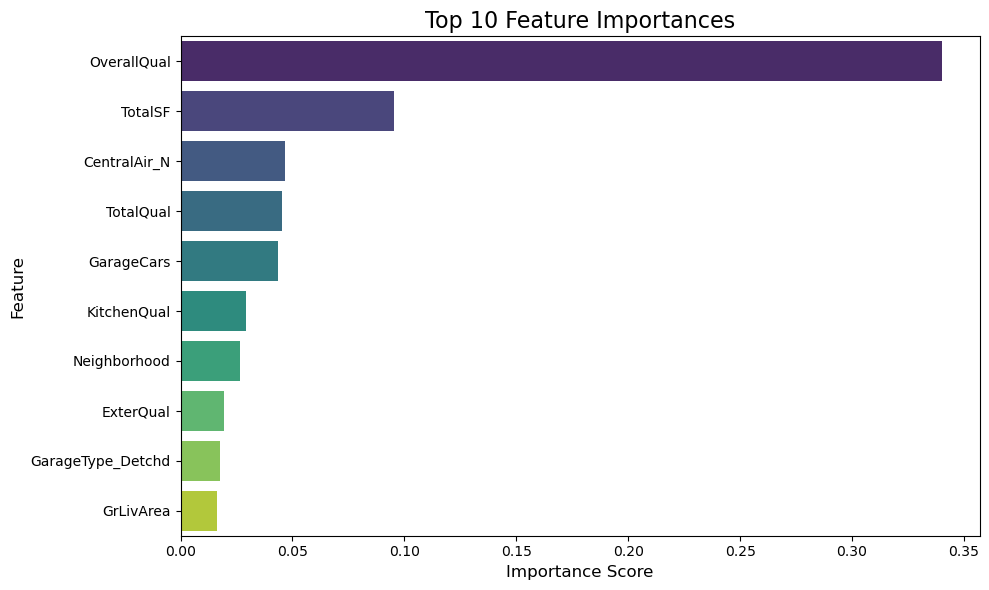

In [177]:
# Select the top features for visualization
top_features = importance_df.head(10)

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title("Top 10 Feature Importances", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

## Feature Importance Analysis

The above graph illustrates the top 10 most important features for predicting housing prices in the dataset, as determined by the XGBoost model. These features contributed the most to the model’s accuracy by improving the splits and reducing errors in the decision trees. 

### Key Observations:
1. **OverallQual**: This feature dominates the chart, confirming that the overall quality of the house is the single most important predictor of housing prices. This aligns with our domain knowledge that buyers value high-quality homes.
2. **TotalSF**: The total square footage of the house (including basement and living areas) is another critical feature, emphasizing that larger homes tend to be more expensive.
3. **CentralAir_N**: Surprisingly, the absence of central air conditioning appears as a significant feature, likely reflecting a strong price penalty for homes without it.
4. **TotalQual**: The aggregation of quality metrics across the house (e.g., exterior, basement, and kitchen quality) further highlights the importance of overall quality in determining price.
5. **GarageCars and KitchenQual**: These features showcase the importance of functionality—garage space and kitchen quality are critical selling points for buyers.
6. **Neighborhood**: The location of a house remains a key driver of price, reaffirming the adage "location, location, location."
7. **Exterior Quality and Detached Garages**: Exterior material and garage type play secondary but still meaningful roles, likely reflecting curb appeal and utility.
8. **GrLivArea**: Above-grade living area, while slightly overshadowed by total square footage, remains a significant factor for pricing.

### Implications for the Project:
This graph provides valuable validation for our feature engineering efforts. Many of the aggregated features we created, such as `TotalSF` and `TotalQual`, are among the top contributors to the model’s performance. Furthermore, the importance of `OverallQual` and `Neighborhood` confirms their intuitive role in housing valuation. 

From a modeling perspective, this reinforces the need to focus on improving data quality for these key variables and ensuring their transformations capture the relationships effectively. It also highlights the diminishing importance of less influential features, allowing us to consider dimensionality reduction or feature pruning in future iterations.


# ACT VI: Submitting Predictions

The moment of truth has arrived! I’ve used my trained XGBoost model to generate predictions on the test dataset, and now it’s time to submit these predictions. This submission will evaluate how well the model’s predictions stack up against the actual housing prices in the test set. 

While the training and cross-validation RMSE provided valuable insights into the model's performance during development, this step is the ultimate test of how well the model generalizes to truly unseen data. The test set contains data points the model has never encountered, making this evaluation the most accurate reflection of its real-world predictive power. 

A successful submission will confirm that all the careful data cleaning, feature engineering, and modeling decisions were worth the effort. Fingers crossed for strong results!


In [188]:
#Predict on Test Data
preds = final_model.predict(X_test)

# Inversing and flooring log scaled price predictions
preds = np.floor(np.expm1(preds))
print(preds)

[121944. 164399. 186714. ... 169593. 106833. 200012.]


In [189]:
try:
    submission = pd.read_csv('test.csv')
except: 
    submision = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

submission["SalePrice"] = preds 

submission = submission[["Id", "SalePrice"]]

In [190]:
# Saving submission file

submission.to_csv('mysubmission.csv', index=False)
submission.shape

(1459, 2)

In [191]:
submission.head()

Id  SalePrice
0  1461   121944.0
1  1462   164399.0
2  1463   186714.0
3  1464   198588.0
4  1465   185289.0